## 1. 집값 데이터 읽기

In [1]:
import numpy as np

# (집 크기(평)), (가격(억원))
# 학교근처(홍은동, 총제동, 구기동, 신영동, 평창동, 녹번동)

import pandas as pd
data = pd.read_csv('house_price.txt', names=['size', 'price'])
print data

X = data['size']  # 제곱미터(평)
y = data['price'] # 억원
m = len(data)     # 정보 개수(행 개수)

         size  price
0   27.575758   6.10
1   26.969697   3.80
2   36.969697   5.70
3   13.636364   1.80
4   56.969697  13.00
5   29.090909   6.20
6   80.303030  12.00
7   51.515152   9.00
8   34.848485   5.30
9   18.484848   1.70
10  30.909091   3.80
11  33.939394   5.80
12  26.060606   3.70
13  32.424242   8.50
14  32.121212   4.70
15  31.818182   4.70
16  30.909091   6.00
17  36.969697   5.00
18  32.424242   6.50
19  33.030303   6.50
20  27.575758   7.00
21  20.000000   2.70
22  25.454545   8.60
23  31.818182   6.20
24  32.424242   5.80
25  32.424242   8.19
26  28.484848   5.09
27  32.424242   8.00
28  37.272727   6.10
29  25.757576   5.90
30  23.333333   6.00
31  31.515152   7.20
32  33.333333   8.50
33  19.393939   3.90
34  33.030303   8.50
35  20.909091   2.50
36  33.636364   5.00
37  21.212121   2.35
38  30.606061   3.30
39  30.909091   4.50
40  29.393939   3.50
41  57.878788   6.30
42  30.909091   4.09
43  18.787879   2.20
44  28.181818   5.20
45  30.606061   3.30
46  21.212121

In [2]:
# numpy array 형태로 변환, 형태 변환(m) -> (m, 1)
X = (np.array(X)).reshape(m,1)
y = (np.array(y)).reshape(m,1)
print X.shape, y.shape

(52, 1) (52, 1)


## 2. 그래프 그리기

In [3]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'b.')
plt.xlabel("Size of a house in Pyoeng") # 집 크기(평)
plt.ylabel("Price in uck-won")          # 매매가(억원)
plt.show()

<Figure size 640x480 with 1 Axes>

## 3. Gradient descent -> theta

* 선형회귀모델  
$h_\theta(x) = \theta_0 + \theta_1x$

* 경사 하강법 알고리즘  
for j=0 and j=1{  
$\theta_j = \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1)$  
}  

* 그라디언트  
$$\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) = 
\begin{pmatrix}
\frac{\partial}{\partial\theta_0}J(\theta_0, \theta_1) \\
\frac{\partial}{\partial\theta_1}J(\theta_0, \theta_1) \\
\end{pmatrix} =   
\begin{pmatrix}
\frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)}-y^{(i)})\cdot1 \\
\frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)}-y^{(i)})\cdot x^{(i)} \\
\end{pmatrix} =   
\frac{1}{m}X_b^T\cdot(X_b \cdot\theta-y)$$  

In [29]:
X_b = np.c_[np.ones((m, 1)), X]  # 모든 샘플에 x0=1을 추가
# c_ : concentenation. 배열을 옆으로 붙이기

learning_rate = 0.0001 # 학습률(learning rate)
n_iter = 200

theta = np.zeros((2,1))
gradients = np.zeros((2,1))

for i in range(n_iter):
    # @@@@@ 코드 작성
    #gradients = 1/m * np.dot(np.ones(X_b.T),np.ones(np.dot(X_b,theta)-y))
    #gradients = 1/m * np.dot(X_b.T,np.dot(X_b,theta)-y)
    gradients = 1/float(m)*(np.dot(X_b.T,np.dot(X_b,theta)-y))
    theta = theta - learning_rate*gradients
print "theta:"
print theta

theta:
[[0.00642125]
 [0.17560879]]


## 4. 집 크기 최소(10평)~최대(90평) * theta -> 그래프 그리기

In [30]:
X_new = np.array([[10],[90]])  # 10~90평
X_new_b = np.c_[np.ones((2,1)), X_new]  # 모든 샘플에 x0=1 을 추가
y_predict = X_new_b.dot(theta)
print "10평과 90평 집의 예측 가격"
print y_predict

10평과 90평 집의 예측 가격
[[ 1.76250917]
 [15.81121253]]


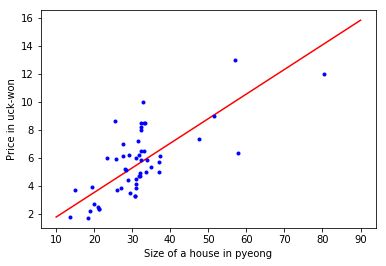

In [31]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel("Size of a house in pyeong") # 집 크기(10평)
plt.ylabel("Price in uck-won") # 매매가 (억원)
plt.show()

## 5. 임의의 집 크기(x_my)에 대한 집값 예측하기

In [32]:
X_mine=np.array([[25]]) # 우리집이 25평이라면?
X_mine_b = np.c_[np.ones((1, 1)), X_mine]  # 모든 샘플에 X0=1 을 추가
y_predict = X_mine_b.dot(theta)
print y_predict, "억원"

[[4.39664105]] 억원


## 6. (Optional) '3. Gradient descent' 대신, 확률적 경사 하강법 함수 호출하여 theta 구하기

In [33]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=100, penalty=None, eta0=0.0001) # eta0(learning rate)
sgd_reg.fit(X, y.ravel()) # sgd_reg.fit(X, y.ravel())  # 1차원 배열로 만들기 (m,1) -> (m)

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=100, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

theta:
[0.01100182] [0.17460251]


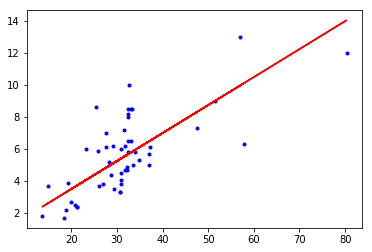

In [34]:
print "theta:"
print sgd_reg.intercept_, sgd_reg.coef_

y_pred = sgd_reg.predict(X)
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r')
plt.show()

In [35]:
# 우리 집이 24평이라면 얼마일까
y_pred = sgd_reg.predict([[25]])
print y_pred, '억원'

[4.37606467] 억원


## 7. (Optional) 비용함수 J($\theta$) 3차원 그래프로 그리기

In [36]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def ComputeJ(t0, t1, X, y):
    m = len(X)
    X_b = np.c_[np.ones((m, 1)), X] # 모든 샘플에 x0=1을 추가
    theta = np.array([t0, t1])
    
    cost_vector = X_b.dot(theta) - y # (52,1)
    
    cost_vector = cost_vector.reshape(-1)
    # 각 원소 제곱
    cost2 = np.square(cost_vector)
    # 원소들 더하기
    cost_sum = np.sum(cost2) / (2*m)
    
    return cost_sum

In [38]:
#1. theta0, theta1, J 값 구하기
d = 100  # # of split

s=1.0
theta0 = np.linspace(-15*s, 15*s, d) # -0.1 ~ 0.1
theta1 = np.linspace(-1.0*s, 1.0*s, d) # 0.1 ~ 0.2

J = np.ones((d,d))  # (100, 100)
for i,t0 in enumerate(theta0):
    for j,t1 in enumerate(theta1):
        cost = ComputeJ(t0,t1,X,y)
        J[i,j] = cost

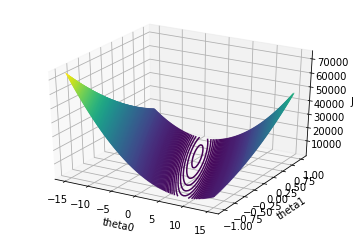

In [39]:
#2. 그리기
pX, pY = np.meshgrid(theta0, theta1)

fig=plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(pX, pY, J, 300, cmap = 'viridis')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J');
plt.show()